In [39]:
import numpy as np
import matplotlib.pyplot as plt
from geometry_tools import hyperbolic, drawtools, coxeter, automata, representation
from numpy import pi, log

# Mangahas Group
rep = representation.Representation()
rep["a"] = np.array([[3, 0], [0, 1/3]], dtype=np.float64)
rep["b"] = np.array([[5/3, 4/3], [4/3, 5/3]], dtype=np.float64)

In [58]:
pos_isometries = rep.freely_reduced_elements(10)
basepoint = 0 + 1j

def mobius_transform(mat, pt):
    return (mat[0,0]*pt + mat[0,1]) / (mat[1,0]*pt + mat[1,1])
    
orbit = [mobius_transform(mat, basepoint) for mat in pos_isometries]

In [59]:
orbit = [[pt.real, pt.imag] for pt in orbit]
orbit = [hyperbolic.Point(pt, model="halfplane") for pt in orbit]
basepoint = hyperbolic.Point((0,1), model="halfplane")
len(orbit)

118097

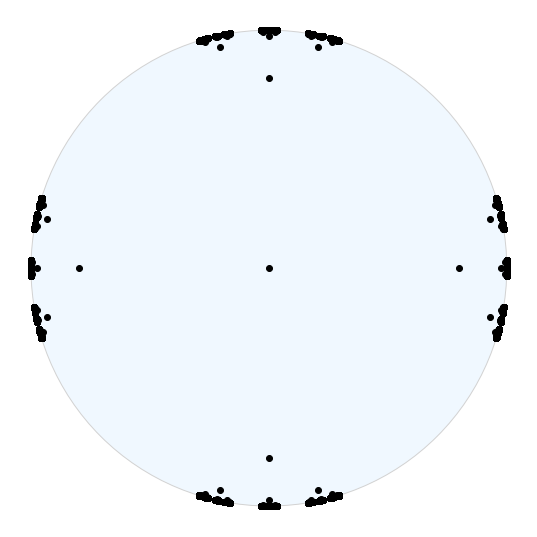

In [61]:
figure = drawtools.HyperbolicDrawing()
figure.draw_plane()
for pt in orbit:
    figure.draw_point(pt)

118097


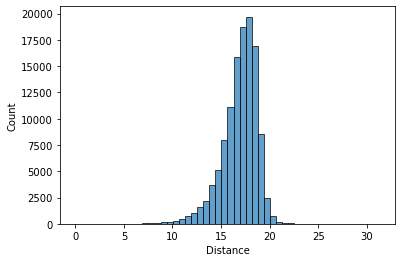

In [63]:
distances = [basepoint.distance(pt) for pt in orbit]
print(len(distances))
plt.hist(distances, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

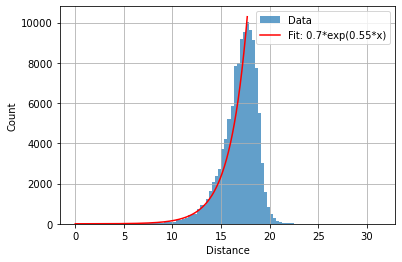

Fitted parameters: a = 0.66, b = 0.55


In [64]:
# Create histogram
counts, bins, _ = plt.hist(distances, bins=100, density=False, alpha=0.7, label='Data')
bin_centers = (bins[:-1] + bins[1:]) / 2

# Find peak index and use only data before it
peak_idx = np.argmax(counts)
x = bin_centers[:peak_idx+1]  # include the peak
counts_before_peak = counts[:peak_idx+1]

# Take logs of positive counts before peak
mask = counts_before_peak > 0
log_counts = np.log(counts_before_peak[mask])
x = x[mask]

# Fit line to log data
coeffs = np.polyfit(x, log_counts, 1)

# Convert back to exponential parameters
a = np.exp(coeffs[1])  # y-intercept becomes exp coefficient
b = coeffs[0]          # slope stays the same

# Generate points for the fitted curve
x_fit = np.linspace(min(bins), bin_centers[peak_idx], 1000)
y_fit = a * np.exp(b * x_fit)

# Plot original histogram and fit
plt.plot(x_fit, y_fit, 'r-', label=f'Fit: {a:.1f}*exp({b:.2f}*x)')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted parameters: a = {a:.2f}, b = {b:.2f}")

In [65]:
crit_exp = b
# Filter to unit interval
filtered = [point for point in orbit if abs(point.halfspace_coords()[0]) < 1 and abs(point.halfspace_coords()[0]) < 1e-3]
print(len(filtered))

1105


In [66]:
dirac_sum = sum(np.exp(-crit_exp * basepoint.distance(point)) for point in filtered)
normalized = sum(np.exp(-crit_exp * basepoint.distance(point)) for point in orbit)
measure = dirac_sum / normalized
measure

0.09287992634254508